# Run clouds over hits and store the output dataframe



### April 2021, JAH

In [1]:
#%matplotlib inline
%matplotlib notebook
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy             as np
import pandas            as pd
import tables            as tb
import matplotlib.pyplot as plt

#to_df = pd.DataFrame.from_records

In [159]:
import hipy.utils        as ut
import hipy.pltext       as pltext
#import hipy.histos       as histos

import clouds        as clouds
import pltclouds     as pltclouds

#import next.reco.chits    as chits
import next.reco.display  as nplay
import next.core.io       as nio

import next.reco.cloudsdia as cloudsdia
#import next.core.city     as ncity


In [4]:
pltext.style()

import warnings
warnings.filterwarnings('ignore')

import time
print(' Last revision ', time.asctime())

 Last revision  Wed Apr 21 15:17:59 2021


### load data

In [5]:
def get_clouds_filename(run_number):
    datadir    = f"/home/hernando/data/NEW"
    run_number = str(run_number)
    filename   = datadir + f'/clouds_ds_{run_number}.h5'
    return filename

def get_clouds_df(fname):
    return pd.read_hdf(fname, 'clouds')    


In [6]:
run_number = 8182
fname      = get_clouds_filename(run_number)
dfclouds   = get_clouds_df(fname)
nevents    = len(dfclouds.groupby('event'))
print(fname)
print('len ', len(dfclouds), 'number of events ', nevents)

/home/hernando/data/NEW/clouds_ds_8182.h5
len  1899479 number of events  2760


In [403]:
ievts = [i for i, evt in dfclouds.groupby('event')]

In [406]:
ii  = 2000
evt = dfclouds[dfclouds['event'] == ievts[ii]]
res = cloudsdia.ana_blobs(evt)
res

,iblob,idblob,blob_e,blob_size,iblob_dist,blob_x,blob_y,blob_z,blob_ecell,nblob_brans,nblob_lbran,iblob_i0,iblob_i1,nblobs,evt_ene,nevt_size,trk_id,trk_ene,trk_dz
0,0,379,0.701759,241.0,2,-95.0,-65.0,396.535801,0.031981,3,13,0,0,3,1.659638,850,379,1.649529,88.0
1,1,388,0.140973,79.0,2,-95.0,-55.0,324.535801,0.007975,3,13,11,11,3,1.659638,850,379,1.649529,88.0
2,2,420,0.068652,49.0,1,-95.0,-45.0,316.535801,0.003237,2,14,12,12,3,1.659638,850,379,1.649529,88.0


{'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': True, 'crests': True, 'crest': False}


<IPython.core.display.Javascript object>


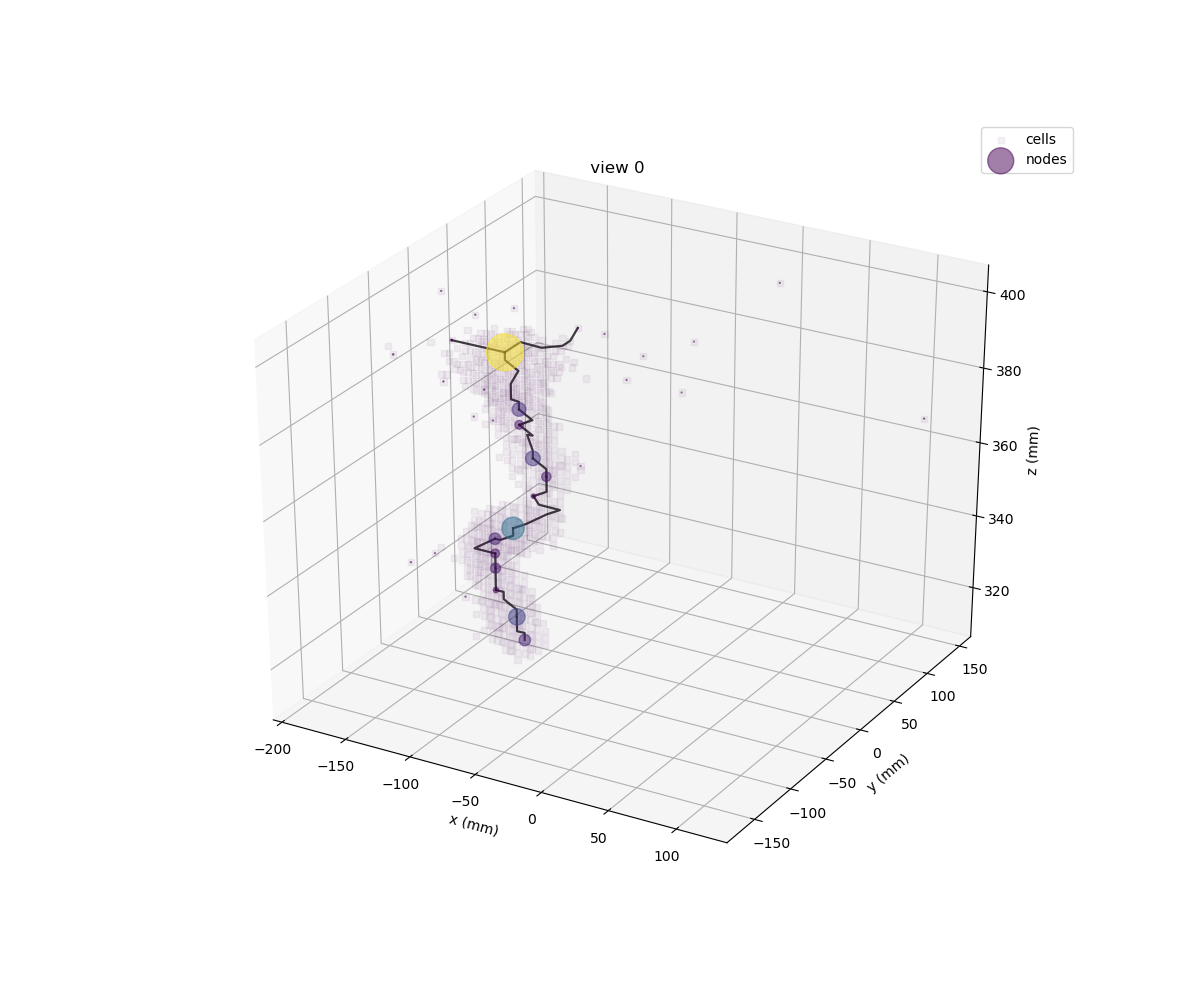

In [407]:
draw, plots = pltclouds.get_draw_clouds(evt)
plots['crest']  = False
plots['tracks'] = True
print(plots)
draw(plots)

In [81]:
print(np.sum(evt.epass[ksel] >0))

2


In [40]:
pairs = zip(enodes, knodes)
pairs = sorted(pairs, reverse = True)
pairs

[(0.4503458890626548, 213),
 (0.19485190910660982, 89),
 (0.10744219525866254, 534),
 (0.09690526804780951, 175),
 (0.09416647692644928, 678),
 (0.0888956844704258, 628),
 (0.08363198158864715, 345),
 (0.07989657562490723, 496),
 (0.07859712416233612, 466),
 (0.07248109277986153, 808),
 (0.07098139466855345, 632),
 (0.06058829706815354, 805),
 (0.05422038503359737, 541),
 (0.035802320234011725, 655),
 (0.02490249455308731, 802),
 (0.014322139536322718, 544),
 (0.0048057097021134, 653),
 (0.000621607401981455, 0),
 (0.0005295104060198418, 6),
 (0.0005224832592902343, 2),
 (0.00047011658867997843, 1),
 (0.0004686711418257881, 916),
 (0.00041097659996703365, 898)]

{'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': False, 'crests': True}


<IPython.core.display.Javascript object>


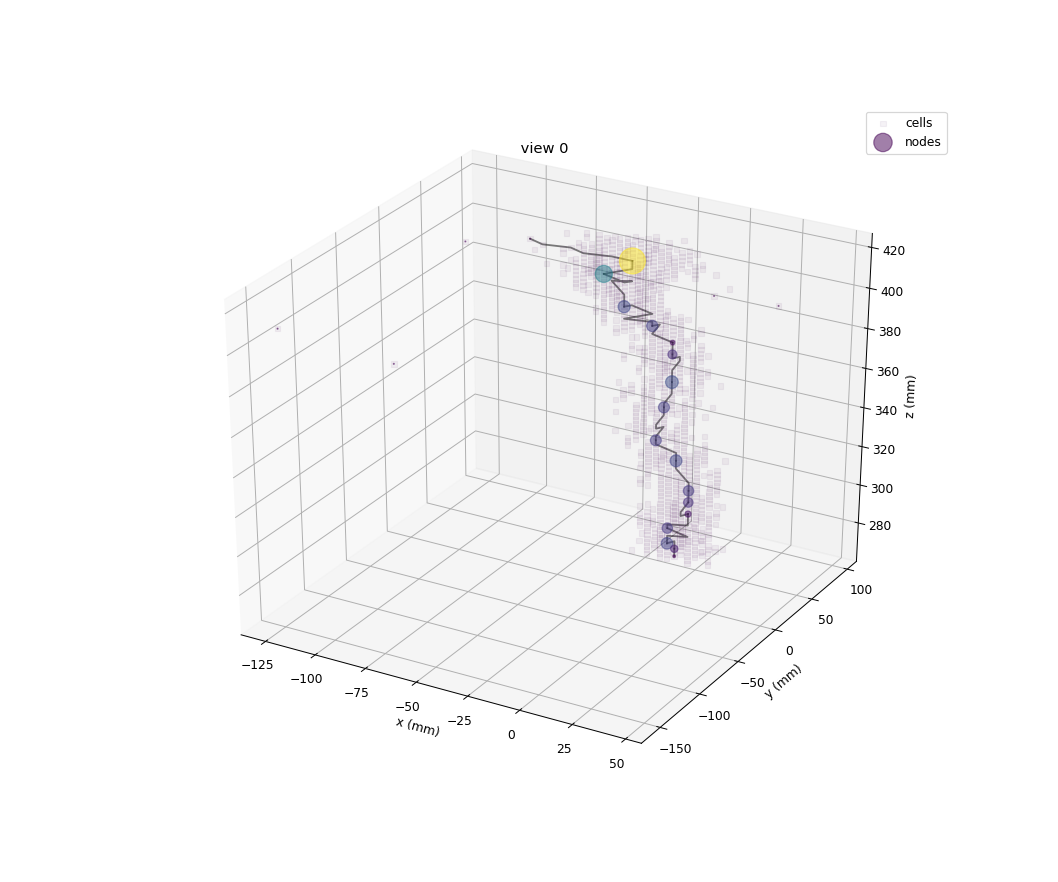

In [86]:
draw, plots = pltclouds.get_draw_clouds(evt)
print(plots)
draw(plots)

In [145]:
dfclouds = run_clouds(evt)

In [146]:
draw, plots = pltclouds.get_draw_clouds(dfclouds)
print(plots)

{'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': False, 'crests': True}


<IPython.core.display.Javascript object>


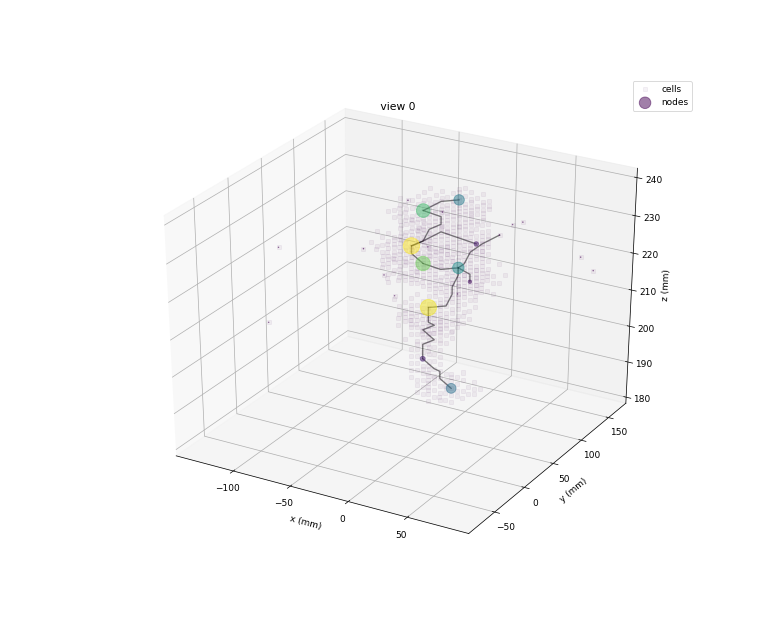

In [147]:
plots['crest'] = False
draw(plots)

In [126]:
#sel = (dfhits.event == ievts[1010]) + (dfhits.event == ievts[1011])
#dh = dfhits[sel]

In [ ]:
res = ncity.core_(dfhits, run_clouds)

event  21667
event  127488
event  226239
event  330485
event  433530
event  523118
event  618613
event  716040
event  824113
event  931567
event  1032258
event  1143692
event  1264204
event  1376119
event  1470107
event  1564871
event  1667556


In [128]:
np.unique(res.event)

array([   1252,    1253,    1266, ..., 2693985, 2696493, 2699574])

In [129]:
res.to_hdf('clouds_ds_'+str(run_number)+'.h5', 'clouds')

In [130]:
res

,x0,x1,x2,k0,k1,k2,ene,kid,egrad,epath,...,lgrad,lpath,lnode,epass,track,tnode,tpass,crest,ecrest,event
0,-195.0,-55.0,194.749638,2,5,1,0.001199,0,0.014853,13,...,0.001199,0,28,0.0,28,-1,-1,-1,-1,1252
1,-195.0,-55.0,196.749638,2,5,2,0.004353,1,0.011699,13,...,0.004353,1,28,0.0,28,-1,-1,-1,-1,1252
2,-195.0,-45.0,194.749638,2,6,1,0.001076,2,0.014976,13,...,0.001076,2,28,0.0,28,-1,-1,-1,-1,1252
3,-195.0,-45.0,196.749638,2,6,2,0.003341,3,0.012711,13,...,0.003341,3,28,0.0,28,-1,-1,-1,-1,1252
4,-195.0,-35.0,196.749638,2,7,2,0.001600,4,0.012557,16,...,0.001600,4,28,0.0,28,-1,-1,-1,-1,1252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862189,-25.0,-15.0,225.167320,18,9,17,0.000362,719,0.000000,719,...,0.000362,719,719,0.0,719,719,-1,719,719,2699574
1862190,15.0,145.0,223.167320,22,25,16,0.000499,720,0.000000,720,...,0.000499,720,720,0.0,720,720,-1,720,720,2699574
1862191,85.0,-55.0,201.167320,29,5,5,0.000383,721,0.000000,721,...,0.000383,721,721,0.0,721,721,-1,721,721,2699574
1862192,95.0,-105.0,225.167320,30,0,17,0.000406,722,0.000000,722,...,0.000406,722,722,0.0,722,722,-1,722,722,2699574


In [131]:
dfclouds = res[res.event == ievts[100]]


In [132]:
draw, plots = pltclouds.get_draw_clouds(dfclouds)
print(plots)

{'cells': True, 'gradients': False, 'nodes': True, 'links': False, 'passes': False, 'segments': False, 'tracks': False, 'crests': True}


<IPython.core.display.Javascript object>


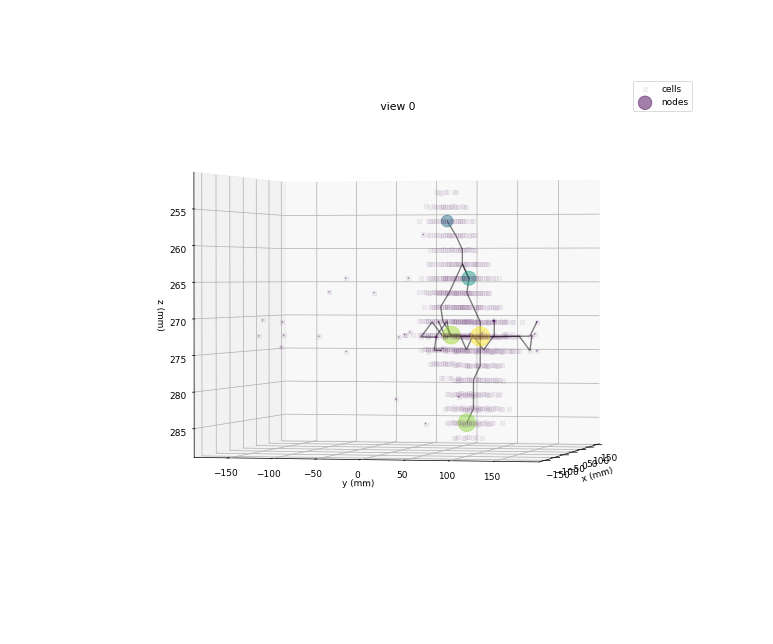

In [135]:
plots['segments'] = False
draw(plots)